In [58]:
# Setup autoreload
%load_ext autoreload
%autoreload 2

# Give yourself access to common
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [59]:
!pip install numpy matplotlib pandas scikit-learn


[notice] A new release of pip is available: 23.0.1 -> 23.1
[notice] To update, run: python3.11 -m pip install --upgrade pip


In [60]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import preprocessing

In [61]:
preprocessing.hello()

Hello from preprocessing


In [62]:
# nba_initial = pd.read_csv('cleaned.csv', index_col=[0])
nba = preprocessing.get_cleaned_baseline_data('../data/cleaned_data/base_cleaned_prev_year_salary.csv')
nba = preprocessing.add_log_y_values(nba)
nba

,Unnamed: 0,seasonStartYear,startYear,height,weight,MP,PTS,Age,games,games_started,...,SAC,SAS,SEA,TOR,TOT,UTA,VAN,WAS,WSB,inflationAdjSalary_log
415,415,1997,1985.0,78.0,198.0,3106.0,2431.0,33.0,82.0,82.0,...,0,0,0,0,0,0,0,0,0,17.843888
416,416,1997,1986.0,84.0,240.0,2887.0,1751.0,34.0,78.0,78.0,...,0,0,0,0,0,0,0,0,0,17.363572
417,417,1997,1988.0,82.0,215.0,2496.0,845.0,31.0,67.0,67.0,...,0,0,0,0,0,0,0,0,0,17.002407
418,418,1997,1993.0,85.0,325.0,1941.0,1336.0,24.0,51.0,51.0,...,0,0,0,0,0,0,0,0,0,16.897047
419,419,1997,1990.0,85.0,235.0,147.0,106.0,31.0,6.0,6.0,...,0,1,0,0,0,0,0,0,0,16.860637
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10461,10461,2017,2015.0,82.0,237.0,135.0,63.0,25.0,18.0,0.0,...,0,0,0,0,0,0,0,0,0,11.358410
10465,10465,2017,2015.0,78.0,215.0,220.0,68.0,21.0,29.0,0.0,...,0,0,0,0,0,0,0,0,0,11.358410
10471,10471,2017,2016.0,78.0,205.0,381.0,127.0,23.0,39.0,1.0,...,0,0,0,0,0,0,0,0,0,11.358410
10481,10481,2017,2017.0,74.0,185.0,231.0,106.0,29.0,17.0,0.0,...,0,0,0,0,0,0,0,0,0,11.317555


In [63]:

X_train, X_test, y_train, y_test = preprocessing.split_data(nba)
print(X_train)
print(y_train)


[[1997. 1985.   78. ...    0.    0.    0.]
 [1997. 1986.   84. ...    0.    0.    0.]
 [1997. 1988.   82. ...    0.    0.    0.]
 ...
 [2014. 2014.   75. ...    0.    0.    0.]
 [2014. 2014.   81. ...    0.    0.    0.]
 [2014. 2014.   74. ...    0.    0.    0.]]
[17.84388829 17.36357217 17.0024073  ... 10.91049612 10.91049612
 10.91049612]


In [64]:
# Linear Rgeression model of the form y = w0 + w1x

from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)  
y_pred = regressor.predict(X_test)

In [65]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error


MSE = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.6876269413790835, R2: 0.5585391136391529


Text(0.5, 1.0, 'Residual Plot for Linear Regression')

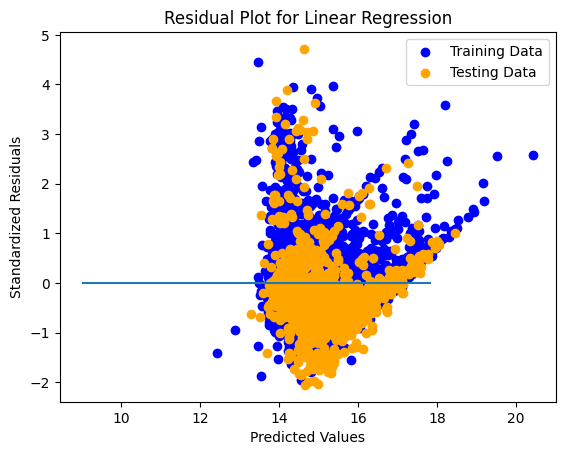

In [66]:
plt.scatter(regressor.predict(X_train), regressor.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(regressor.predict(X_test), regressor.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_train.min(), xmax=y_train.max())
plt.xlabel("Predicted Values")
plt.ylabel("Standardized Residuals")
plt.title("Residual Plot for Linear Regression")

In [67]:
#attempted scaling of all feautures vs taking the log of just the prices (target) and the latter gives better performance
from sklearn.preprocessing import MinMaxScaler

# X_train
# scaler = MinMaxScaler()
# numeric_vars = ['MP', 'PTS', 'Age', 'games', 'games_started', 'PER', 'FTr', 'AST', 'STL', 'TRB', 'FT', '3P', 'FG']
# X_train[numeric_vars] = scaler.fit_transform(X_train[numeric_vars])
# X_test[numeric_vars] = scaler.fit_transform(X_test[numeric_vars])
# y_train = scaler.fit_transform(y_train)
# y_test = scaler.fit_transform(y_test)
# y_train

In [89]:

from sklearn.feature_selection import RFE

lm = LinearRegression()
lm.fit(X_train, y_train)

#testing with number of features=11
rfe = RFE(lm, n_features_to_select=61)             
rfe = rfe.fit(X_train, y_train)

In [69]:
# list(zip(rfe.support_,rfe.ranking_))

In [90]:
y_pred = rfe.predict(X_test)

# evaluate the model on test set
r2 = r2_score(y_test, y_pred)
print(r2)

-393711673475.5428


In [91]:
from sklearn.model_selection import GridSearchCV

hyper_params = [{'n_features_to_select': list(range(1, 65))}]


lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm)             

model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = 5, 
                        verbose = 1,
                        return_train_score=True)      

model_cv.fit(X_train, y_train)  

Fitting 5 folds for each of 64 candidates, totalling 320 fits


In [ ]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results
be = model_cv.best_score_
best_index = model_cv.best_index_

print("Best result:", be, "at index", best_index)

Best result: 0.615061716918804 at index 62


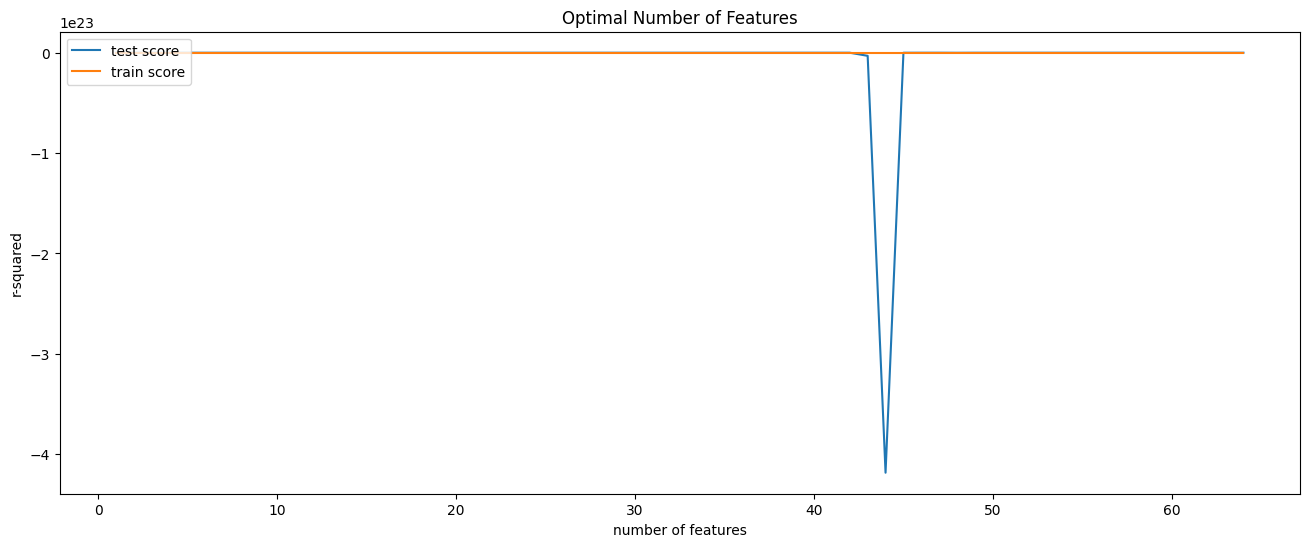

In [ ]:
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

In [ ]:
n_features_optimal = 62 #from graph above

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=n_features_optimal)             
rfe = rfe.fit(X_train, y_train)
list(zip(X_train,rfe.support_,rfe.ranking_))


[(array([1.9970000e+03, 1.9850000e+03, 7.8000000e+01, 1.9800000e+02,
         3.1060000e+03, 2.4310000e+03, 3.3000000e+01, 8.2000000e+01,
         8.2000000e+01, 2.7800000e+01, 3.0400000e-01, 3.5200000e+02,
         1.4000000e+02, 4.8200000e+02, 4.8000000e+02, 1.1100000e+02,
         9.2000000e+02, 5.2258566e+07, 0.0000000e+00, 0.0000000e+00,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
         1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
         0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 0.0000000e+00,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
         0.0000000e+00, 0.0000000e

In [75]:
# predict prices of X_test
y_pred = rfe.predict(X_test)
r2 = r2_score(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)
rms = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
print(f"MSE: {MSE}, R2: {r2}, RMSE: {rms}, MAE: {mae}")

MSE: 5.622166250335045e+16, R2: -3.609466626137703e+16, RMSE: 237111076.29832575, MAE: 41738228.787582986


In [76]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import SGDRegressor
from scipy.stats import uniform 
from scipy.stats import randint

parameters = {
                'alpha': uniform(0.00001, 0.001),
                'max_iter': randint(500, 1500),
                'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive'],
                'eta0': uniform(0.001,0.1)
            }
model = SGDRegressor()
randm_src = RandomizedSearchCV(estimator=model, param_distributions = parameters, cv=2, n_iter = 10, n_jobs=-1)
randm_src.fit(X_train, y_train.reshape((-1,)))
print(" Results from Random Search " )
print("\n The best estimator across ALL searched params:\n", randm_src.best_estimator_)
print("\n The best score across ALL searched params:\n", randm_src.best_score_)
print("\n The best parameters across ALL searched params:\n", randm_src.best_params_)

 Results from Random Search 

 The best estimator across ALL searched params:
 SGDRegressor(alpha=0.00041812084117387086, eta0=0.09833591725352936,
             learning_rate='adaptive', max_iter=852)

 The best score across ALL searched params:
 -4.7174957798534654e+38

 The best parameters across ALL searched params:
 {'alpha': 0.00041812084117387086, 'eta0': 0.09833591725352936, 'learning_rate': 'adaptive', 'max_iter': 852}


In [77]:
sgdregressor = SGDRegressor(alpha=randm_src.best_params_['alpha'], max_iter=randm_src.best_params_['max_iter'],
                            learning_rate=randm_src.best_params_['learning_rate'], eta0=randm_src.best_params_['eta0'])
# sgdregressor = SGDRegressor()
# sgdregressor.fit(X_train, y_train.values.reshape((-1,)))  
# y_pred_sgd = sgdregressor.predict(X_test)

rfe = RFE(sgdregressor, n_features_to_select=n_features_optimal)             
rfe = rfe.fit(X_train, y_train.reshape((-1,)))

y_pred_sgd = rfe.predict(X_test)

In [78]:
MSE_sgd = mean_squared_error(y_test, y_pred_sgd)
r2_sgd = r2_score(y_test, y_pred_sgd)
rms_sgd = mean_squared_error(y_test, y_pred_sgd, squared=False)
mae_sgd = mean_absolute_error(y_test, y_pred_sgd)
print(f"MSE: {MSE_sgd}, R2: {r2_sgd}, RMSE: {rms_sgd}, MAE: {mae_sgd}")

MSE: 1.9596640380207558e+39, R2: -1.2581168234320071e+39, RMSE: 4.426809277595722e+19, MAE: 4.149963661090463e+19


Text(0.5, 1.0, 'Residual Plot for SGDRegressor')

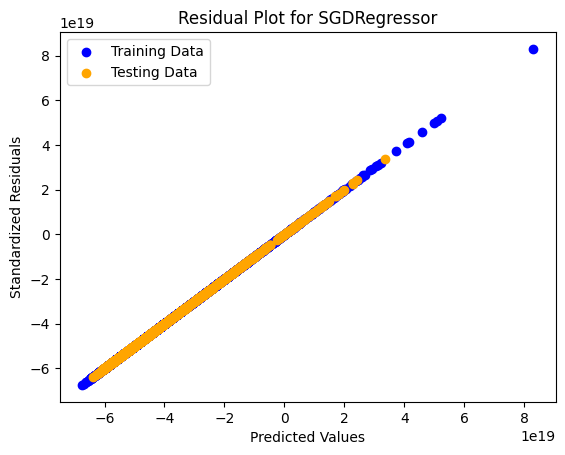

In [79]:
plt.scatter(rfe.predict(X_train), rfe.predict(X_train) - y_train.reshape((-1,)), c="blue", label="Training Data")
plt.scatter(rfe.predict(X_test), rfe.predict(X_test) - y_test.reshape((-1,)), c="orange", label="Testing Data")
plt.legend()
plt.xlabel("Predicted Values")
plt.ylabel("Standardized Residuals")
plt.hlines(y=0, xmin=y_train.min(), xmax=y_train.max())
plt.title("Residual Plot for SGDRegressor")

In [80]:
from sklearn.linear_model import Lasso

parameters = {
                'alpha': uniform(0, 10)
             }
model = Lasso()
randm_src_lasso = RandomizedSearchCV(estimator=model, param_distributions = parameters, cv=2, n_iter = 10, n_jobs=-1)
randm_src_lasso.fit(X_train, y_train)
print("\n The best parameters across ALL searched params:\n", randm_src_lasso.best_params_)

lassoregressor = Lasso(alpha=randm_src_lasso.best_params_['alpha'])
# lassoregressor.fit(X_train, y_train)  
# y_pred_lasso = lassoregressor.predict(X_test)

rfe = RFE(lassoregressor, n_features_to_select=n_features_optimal)             
rfe = rfe.fit(X_train, y_train)
y_pred_lasso = rfe.predict(X_test)

MSE_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)
rms_lasso = mean_squared_error(y_test, y_pred_lasso, squared=False)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)

print(f"MSE: {MSE_lasso}, R2: {r2_lasso}, RMSE: {rms_lasso}, MAE: {mae_lasso}")


 The best parameters across ALL searched params:
 {'alpha': 0.23311061151063184}
MSE: 0.673660464576426, R2: 0.5675056809122061, RMSE: 0.8207682161100209, MAE: 0.5634414463838612


Text(0.5, 1.0, 'Residual Plot for Linear Model with L1 regularization')

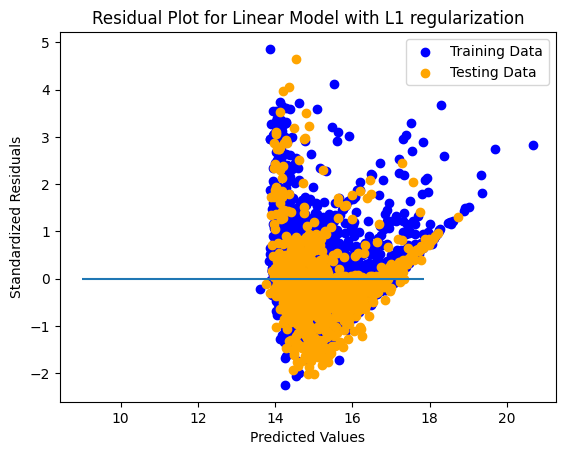

In [81]:
plt.scatter(rfe.predict(X_train), rfe.predict(X_train) - y_train.reshape((-1,)), c="blue", label="Training Data")
plt.scatter(rfe.predict(X_test), rfe.predict(X_test) - y_test.reshape((-1,)), c="orange", label="Testing Data")
plt.legend()
plt.xlabel("Predicted Values")
plt.ylabel("Standardized Residuals")
plt.hlines(y=0, xmin=y_train.min(), xmax=y_train.max())
plt.title("Residual Plot for Linear Model with L1 regularization")

In [82]:
from sklearn.linear_model import Ridge

parameters = {
                'alpha': uniform(0, 10)
             }
model = Ridge()
randm_src_ridge = RandomizedSearchCV(estimator=model, param_distributions = parameters, cv=2, n_iter = 10, n_jobs=-1)
randm_src_ridge.fit(X_train, y_train)
print("\n The best parameters across ALL searched params:\n", randm_src_ridge.best_params_)

ridgeregressor = Ridge(alpha=randm_src_ridge.best_params_['alpha'])
# ridgeregressor.fit(X_train, y_train)  
# y_pred_ridge = ridgeregressor.predict(X_test)
rfe = RFE(ridgeregressor, n_features_to_select=n_features_optimal)             
rfe = rfe.fit(X_train, y_train)
y_pred_ridge = rfe.predict(X_test)

MSE_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
rms_ridge = mean_squared_error(y_test, y_pred_ridge, squared=False)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)

print(f"MSE: {MSE_ridge}, R2: {r2_ridge}, RMSE: {rms_ridge}, MAE: {mae_ridge}")

/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.4448e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.57923e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.57268e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.43845e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216


 The best parameters across ALL searched params:
 {'alpha': 9.658087853314175}


/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.23777e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.23777e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


MSE: 0.9802054614861854, R2: 0.37070183583037075, RMSE: 0.9900532619441165, MAE: 0.7463985929490952


Text(0.5, 1.0, 'Residual Plot for Linear Model with Ridge regularization')

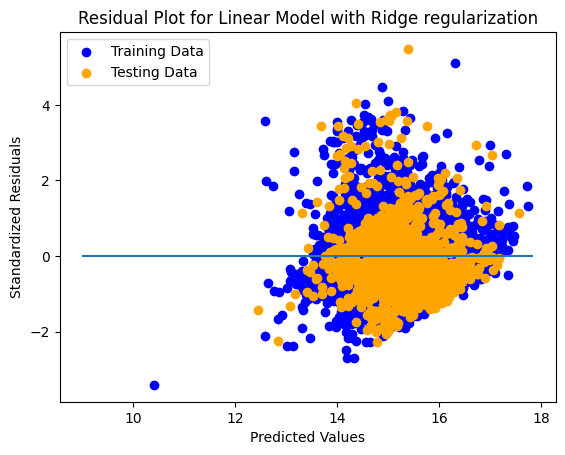

In [83]:
plt.scatter(rfe.predict(X_train), rfe.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(rfe.predict(X_test), rfe.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.xlabel("Predicted Values")
plt.ylabel("Standardized Residuals")
plt.hlines(y=0, xmin=y_train.min(), xmax=y_train.max())
plt.title("Residual Plot for Linear Model with Ridge regularization")

In [84]:
from sklearn.linear_model import LassoCV

lassocvregressor = LassoCV()
lassocvregressor.fit(X_train, y_train)  
y_pred_lassocv = lassocvregressor.predict(X_test)

MSE_lassocv = mean_squared_error(y_test, y_pred_lassocv)
r2_lassocv = r2_score(y_test, y_pred_lassocv)
rms_lassocv = mean_squared_error(y_test, y_pred_lassocv, squared=False)
mae_lassocv = mean_absolute_error(y_test, y_pred_lassocv)

print(f"MSE: {MSE_lassocv}, R2: {r2_lassocv}, RMSE: {rms_lassocv}, MAE: {mae_lassocv}")

MSE: 0.8421677141498218, R2: 0.4593229508904494, RMSE: 0.9176969620467433, MAE: 0.6303772516805818


Text(0.5, 1.0, 'Residual Plot for LassoCV model')

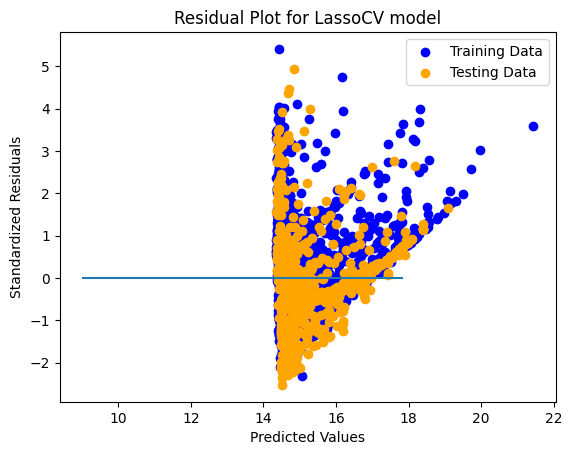

In [85]:
plt.scatter(lassocvregressor.predict(X_train), lassocvregressor.predict(X_train) - y_train.reshape((-1,)), c="blue", label="Training Data")
plt.scatter(lassocvregressor.predict(X_test), lassocvregressor.predict(X_test) - y_test.reshape((-1,)), c="orange", label="Testing Data")
plt.legend()
plt.xlabel("Predicted Values")
plt.ylabel("Standardized Residuals")
plt.hlines(y=0, xmin=y_train.min(), xmax=y_train.max())
plt.title("Residual Plot for LassoCV model")